In [1]:
import pandas as PD
import seaborn as SNS
import matplotlib.pyplot as plt

In [2]:
# Parking and Camera violations 2021
# https://data.cityofnewyork.us/City-Government/Open-Parking-and-Camera-Violations/nc67-uf89
file = PD.read_csv("Violations-Large.csv")

In [3]:
file.tail()

,PLATE,STATE,LICENSE_TYPE,SUMMONS_NUMBER,ISSUE_DATE,VIOL AMTION_TIME,VIOLATION,FINE_AMOUNT,PENALTY_AMOUNT,INTEREST_AMOUNT,REDUCTION_AMOUNT,PAYMENT_AMOUNT,AMOUNT_DUE,PRECINCT,COUNTY,ISSUING_AGENCY,VIOLATION_STATUS,SUMMONS_IMAGE
499995,KKG8845,NY,PAS,8880869474,7/17/2021,5:49 PM,FRONT OR BACK PLATE MISSING,65,0,0.0,0.0,65.0,0.0,100,Q,TRAFFIC,NaN,http://nycserv.nyc.gov/NYCServWeb/ShowImage?se...
499996,HXK4769,NY,PAS,8880869413,7/17/2021,3:06 PM,NO STANDING-DAY/TIME LIMITS,115,0,0.0,115.0,0.0,0.0,100,Q,TRAFFIC,HEARING HELD-NOT GUILTY,http://nycserv.nyc.gov/NYCServWeb/ShowImage?se...
499997,KKF1155,NY,PAS,8869874333,3/11/2021,8:07 AM,NO STANDING-EXC. TRUCK LOADING,95,0,0.0,0.0,95.0,0.0,102,Q,TRAFFIC,NaN,http://nycserv.nyc.gov/NYCServWeb/ShowImage?se...
499998,BDP1920,NY,PAS,8880869590,7/19/2021,11:40 AM,EXPIRED MUNI METER,35,0,0.0,0.0,35.0,0.0,112,Q,TRAFFIC,NaN,http://nycserv.nyc.gov/NYCServWeb/ShowImage?se...
499999,JEN6431,NY,PAS,8871058835,2/15/2021,5:57 AM,FIRE HYDRANT,115,0,0.0,0.0,115.0,0.0,104,Q,TRAFFIC,NaN,http://nycserv.nyc.gov/NYCServWeb/ShowImage?se...


In [4]:
list(file)

['PLATE',
 'STATE',
 'LICENSE_TYPE',
 'SUMMONS_NUMBER',
 'ISSUE_DATE',
 'VIOL AMTION_TIME',
 'VIOLATION',
 'FINE_AMOUNT',
 'PENALTY_AMOUNT',
 'INTEREST_AMOUNT',
 'REDUCTION_AMOUNT',
 'PAYMENT_AMOUNT',
 'AMOUNT_DUE',
 'PRECINCT',
 'COUNTY',
 'ISSUING_AGENCY',
 'VIOLATION_STATUS',
 'SUMMONS_IMAGE']

In [5]:
Relavnet = file[['STATE',"LICENSE_TYPE","VIOLATION","FINE_AMOUNT","REDUCTION_AMOUNT","PAYMENT_AMOUNT","PRECINCT","ISSUING_AGENCY","VIOLATION_STATUS"]]
Relavnet

,STATE,LICENSE_TYPE,VIOLATION,FINE_AMOUNT,REDUCTION_AMOUNT,PAYMENT_AMOUNT,PRECINCT,ISSUING_AGENCY,VIOLATION_STATUS
0,NY,PAS,OBSTRUCTING DRIVEWAY,95,0.0,95.0,115,POLICE DEPARTMENT,NaN
1,NY,PAS,OBSTRUCTING DRIVEWAY,95,0.0,95.0,114,OTHER/UNKNOWN AGENCIES,NaN
2,NY,COM,DOUBLE PARKING,115,115.0,0.0,107,POLICE DEPARTMENT,HEARING HELD-NOT GUILTY
3,NY,COM,NGHT PKG ON RESID STR-COMM VEH,65,37.0,28.0,109,POLICE DEPARTMENT,HEARING HELD-GUILTY REDUCTION
4,NY,PAS,NO STANDING-DAY/TIME LIMITS,115,0.0,115.0,102,FIRE DEPARTMENT,NaN
...,...,...,...,...,...,...,...,...,...
499995,NY,PAS,FRONT OR BACK PLATE MISSING,65,0.0,65.0,100,TRAFFIC,NaN
499996,NY,PAS,NO STANDING-DAY/TIME LIMITS,115,115.0,0.0,100,TRAFFIC,HEARING HELD-NOT GUILTY
499997,NY,PAS,NO STANDING-EXC. TRUCK LOADING,95,0.0,95.0,102,TRAFFIC,NaN
499998,NY,PAS,EXPIRED MUNI METER,35,0.0,35.0,112,TRAFFIC,NaN


In [6]:
Relavnet = Relavnet.loc[~Relavnet["STATE"].str.contains("9")]

In [28]:
Relavnet["LICENSE_TYPE"].value_counts()

PAS    410932
COM     49069
OMT     15653
SRF      6079
MOT      3315
OMS      3070
999      1756
ORG      1160
TRC      1150
APP      1089
SPO       787
LMB       598
MED       419
RGL       380
OMR       361
CMB       247
TOW       240
TRL       239
ITP       139
DLR       135
OML       129
HIS       104
SCL        87
TRA        61
VAS        61
SRN        53
IRP        48
MCL        37
MCD        25
OMV        14
SEM         9
STG         9
AGR         8
HAM         8
PHS         8
BOB         7
SPC         6
LTR         5
AYG         4
NLM         4
ARG         4
RGC         3
SOS         3
NYS         2
CHC         2
NYC         2
AMB         1
LUA         1
CMH         1
LMC         1
ORC         1
CSP         1
AGC         1
BOT         1
Name: LICENSE_TYPE, dtype: int64

In [7]:
Pas = Relavnet.loc[Relavnet["LICENSE_TYPE"].str.contains("PAS")]
Com = Relavnet.loc[Relavnet["LICENSE_TYPE"].str.contains("COM")]

CombinedType = Pas.append(Com)

C:\Users\Jarek718\AppData\Local\Temp\ipykernel_12148\1974962027.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  CombinedType = Pas.append(Com)


In [8]:
CombinedType['LICENSE_TYPE'].value_counts()

PAS    410932
COM     49069
Name: LICENSE_TYPE, dtype: int64

In [9]:
CombinedTypeGroup = CombinedType.groupby(["STATE","LICENSE_TYPE"])
CombinedTypeGroup.size()

STATE  LICENSE_TYPE
AB     PAS               7
AK     PAS              11
AL     PAS             294
AR     PAS              88
AZ     PAS             855
                      ... 
VT     PAS             207
WA     PAS             363
WI     PAS             471
WV     PAS              88
WY     PAS              25
Length: 65, dtype: int64

<AxesSubplot:xlabel='STATE'>

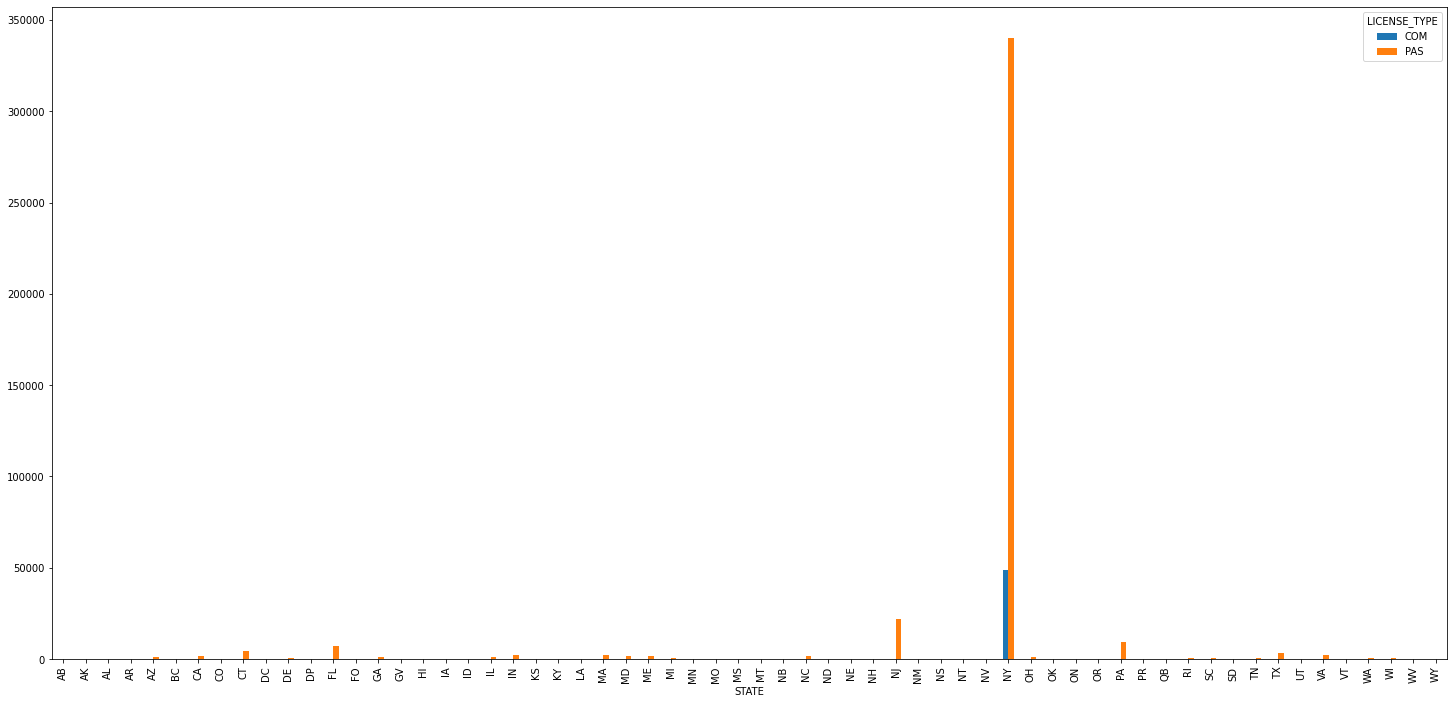

In [27]:
CombinedTypeGroup.size().unstack(level=1).plot(kind = "bar", figsize=(25,12))

In [18]:
NYS = CombinedType.loc[CombinedType["STATE"].str.contains("NY")]
NYS

,STATE,LICENSE_TYPE,VIOLATION,FINE_AMOUNT,REDUCTION_AMOUNT,PAYMENT_AMOUNT,PRECINCT,ISSUING_AGENCY,VIOLATION_STATUS
0,NY,PAS,OBSTRUCTING DRIVEWAY,95,0.0,95.0,115,POLICE DEPARTMENT,NaN
1,NY,PAS,OBSTRUCTING DRIVEWAY,95,0.0,95.0,114,OTHER/UNKNOWN AGENCIES,NaN
4,NY,PAS,NO STANDING-DAY/TIME LIMITS,115,0.0,115.0,102,FIRE DEPARTMENT,NaN
5,NY,PAS,OBSTRUCTING DRIVEWAY,95,0.0,95.0,102,POLICE DEPARTMENT,NaN
6,NY,PAS,NO STANDING-DAY/TIME LIMITS,115,0.0,115.0,113,PORT AUTHORITY,NaN
...,...,...,...,...,...,...,...,...,...
499904,NY,COM,INSP. STICKER-EXPIRED/MISSING,65,0.0,65.0,107,TRAFFIC,NaN
499907,NY,COM,DOUBLE PARKING,115,80.0,35.0,107,TRAFFIC,HEARING HELD-GUILTY REDUCTION
499911,NY,COM,COMML PLATES-UNALTERED VEHICLE,115,0.0,115.0,102,TRAFFIC,NaN
499918,NY,COM,COMML PLATES-UNALTERED VEHICLE,115,0.0,115.0,103,TRAFFIC,NaN


In [19]:
NYS = NYS.loc[~NYS["LICENSE_TYPE"].str.contains("9")]

In [20]:
NYSGrouby = NYS.groupby(["ISSUING_AGENCY","LICENSE_TYPE"])
NYSGrouby.size()

ISSUING_AGENCY                       LICENSE_TYPE
BOARD OF ESTIMATE                    PAS                  6
CON RAIL                             COM                  3
                                     PAS                 15
DEPARTMENT OF BUSINESS SERVICES      PAS                 10
DEPARTMENT OF SANITATION             COM                522
                                     PAS               6323
FIRE DEPARTMENT                      COM                  1
                                     PAS                 75
HOUSING AUTHORITY                    PAS                  6
LONG ISLAND RAILROAD                 COM                  1
                                     PAS                 23
OTHER/UNKNOWN AGENCIES               COM                 55
                                     PAS               1260
PARKS DEPARTMENT                     COM                 21
                                     PAS               1828
POLICE DEPARTMENT                    COM          

<AxesSubplot:xlabel='ISSUING_AGENCY'>

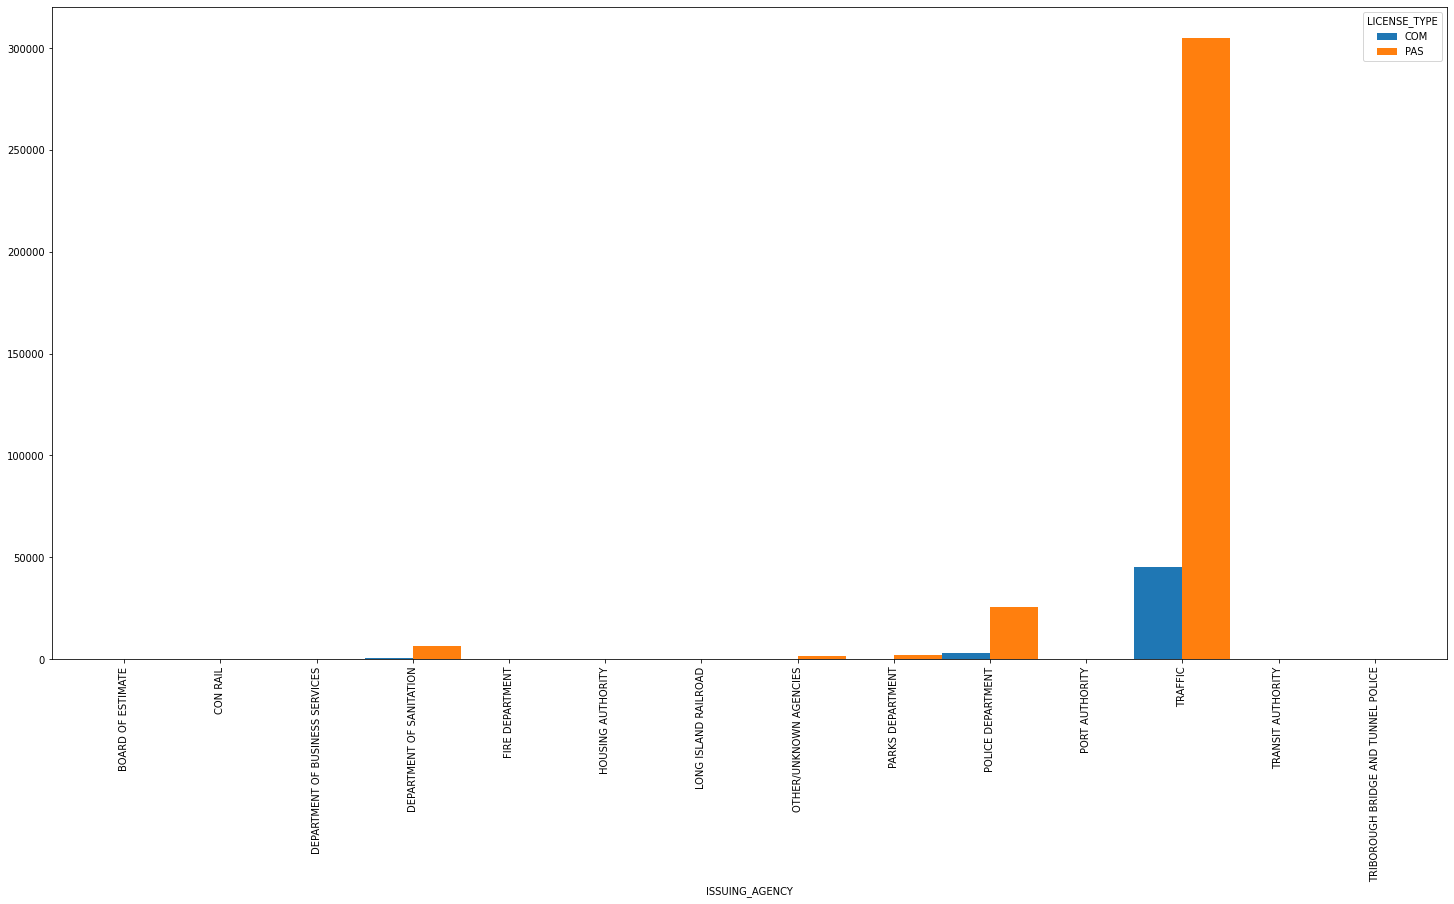

In [26]:
NYSGrouby.size().unstack(level=1).plot(kind = "bar", figsize=(25,12), width=1)

In [22]:
Reduction = Relavnet.loc[Relavnet["STATE"].str.contains("NY")]

In [23]:
NYSTraffic = Reduction.loc[Reduction["ISSUING_AGENCY"].str.contains("TRAFFIC")]

<AxesSubplot:xlabel='VIOLATION'>

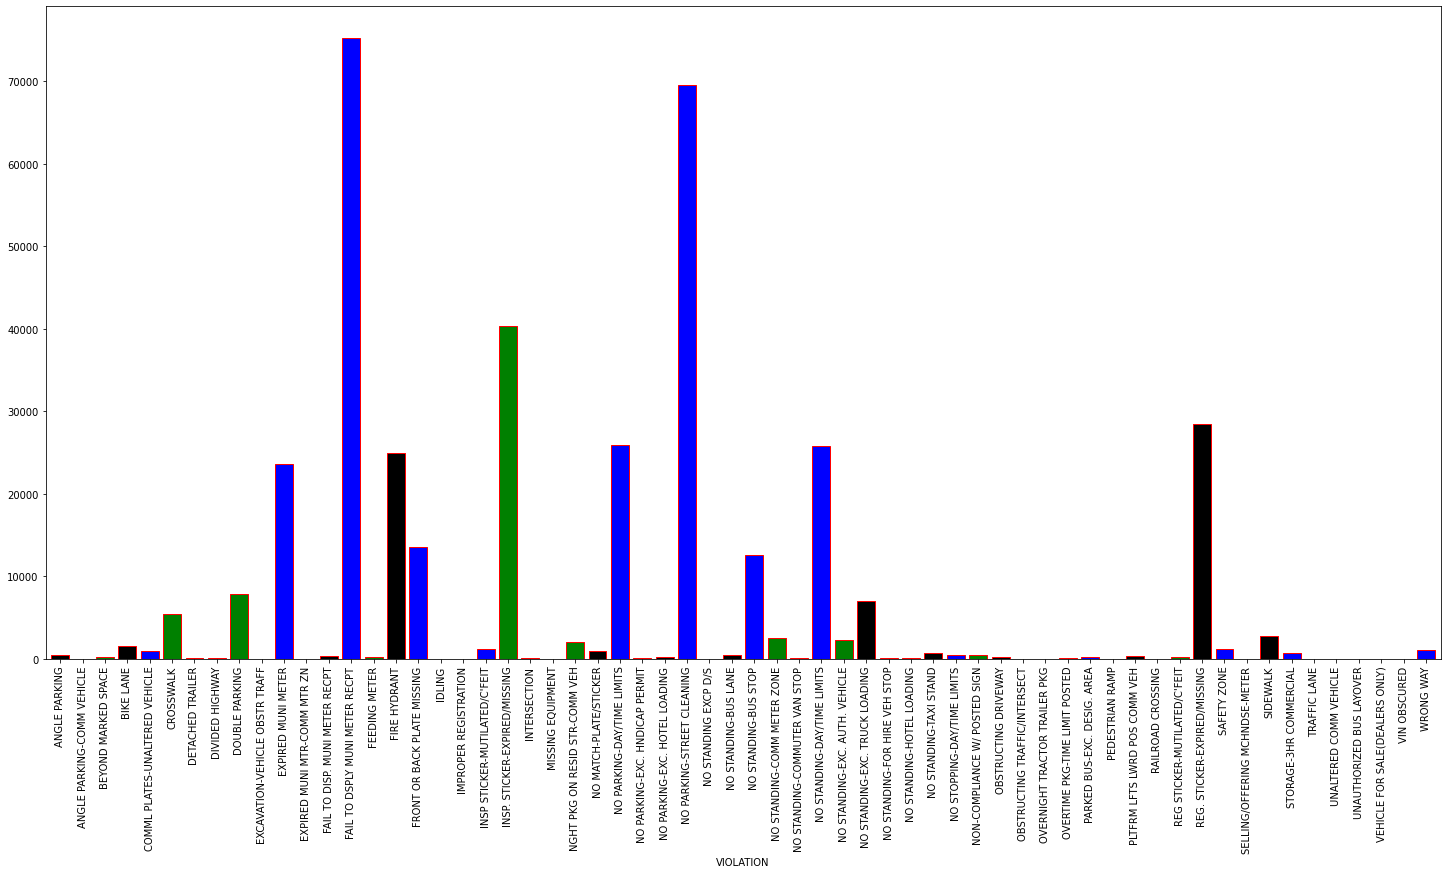

In [25]:
NYSTraffic.groupby("VIOLATION").size().plot(kind = "bar", figsize=(25,12), width=0.8, edgecolor='red', color=["black", "blue", "green"])